### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [1]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots_numtrips as makeplots
import pickle
import MAIN_config_hour_of_day as config
#import MAIN_config_season as config

External files

In [2]:
dir_names=config.dirnames
curvefigfile="curve_compare_trips.png"
scatterfigfile="scatter_compare_trips.png"

In [3]:
TradeoffDict={}
for d,dirname in enumerate(dir_names):
    dataName=dirname+"/data.p"
    windowname=config.windower(d).name
    dataName=dirname+"/data.p"
    data=pickle.load(open(dataName,"rb"))
    TradeoffDict[windowname]=makeplots.tradeoff(data)

Manhattan whole day
Manhattan evening and morning
Manhattan morning rush hour
Manhattan midday
Manhattan evening rush hour


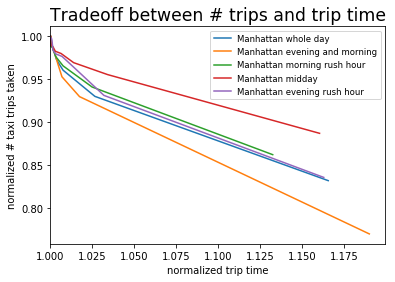

In [5]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    points=tradeoff.curve()
    #print("points: "+str(points))
    plotter.plot(points["rel_time"],points["rel_trips"],label=windowname)
plotter.xlim(1,)
plotter.title("Tradeoff between # trips and trip time",fontsize = 'xx-large')
plotter.xlabel("normalized trip time",fontsize='medium')
plotter.ylabel("normalized # taxi trips taken",fontsize = 'medium')
plotter.legend(loc=0,prop={'size':8.5})
plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [ ]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_num_trips"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("Tradeoff of change in #trips and trip time")
plotter.xlabel("relative trip time")
plotter.ylabel("relative #trips")
plotter.legend()
plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()